In [3]:
import numpy as np
import scipy.linalg as la
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

## Part b.

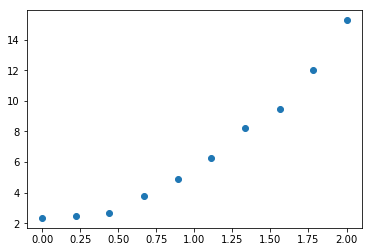

In [4]:
x = [0.00,0.22,0.44,0.67,0.89,1.11,1.33,1.56,1.78,2.00]
y = [2.36,2.49,2.67,3.82,4.87,6.28,8.23,9.47,12.01,15.26]
plt.plot(x,y,'o')
plt.show()

In [5]:
def gen_mat(x,n): #generates the matrix A for a given set of x-data with highest degree polynomial n
    if n == 0:
        return np.transpose(np.asarray([1 for i in range(len(x))]))
    A = np.asarray([[i] for i in np.transpose(np.asarray(x))])
    
    A_n = np.asarray([[i] for i in np.transpose(np.asarray(x))])
    for i in range(2,n+1):
        A = np.hstack((A,A_n**i))
    ones = np.asarray([[i] for i in np.transpose(np.asarray([1 for i in range(len(x))]))])
    return np.hstack((ones,A))
        

In [6]:
#solving the normal equations
coeffs_mat = []
obj = []
b = np.asarray(y)
for n in range(10):

    A = gen_mat(x,n)
    A_T = np.transpose(A)
    ATA = np.matmul(A_T,A)

    ATb = np.matmul(A_T,b)
    if n == 0: #having trouble using the code for n=0 as well
        coeffs = [1/ATA*ATb]
        obj_val = np.sum((y-A*coeffs)**2)
    else:
        coeffs=np.matmul(np.linalg.inv(ATA),ATb)
        obj_val = np.sum((y-np.matmul(A,np.transpose(coeffs)))**2)
    coeffs_mat.append(coeffs)
    obj.append(obj_val)

## Part c.

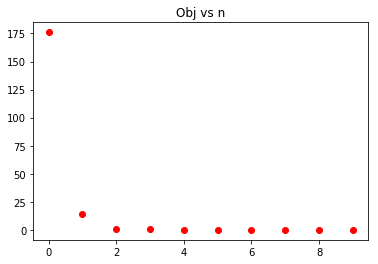

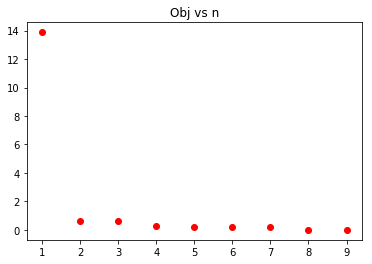

In [7]:
plt.plot([i for i in range(0,10)],obj[0:10],'ro')
plt.title("Obj vs n")
plt.show()
plt.plot([i for i in range(1,10)],obj[1:10],'ro')
plt.title("Obj vs n")
plt.show()

## Part d.


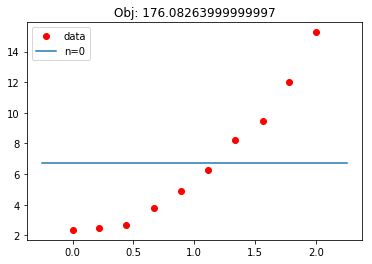

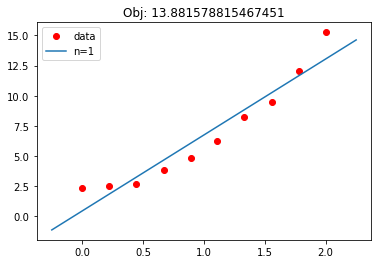

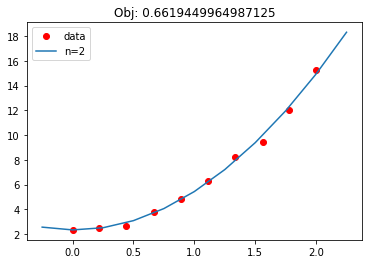

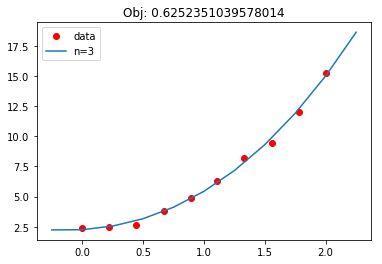

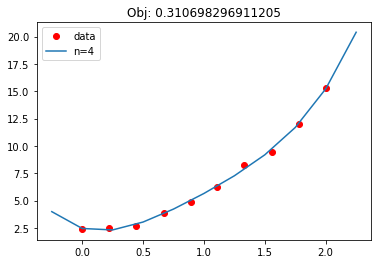

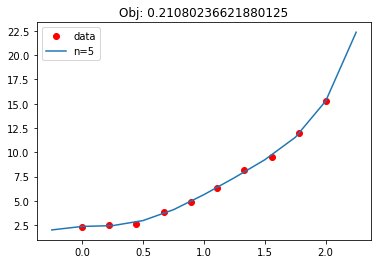

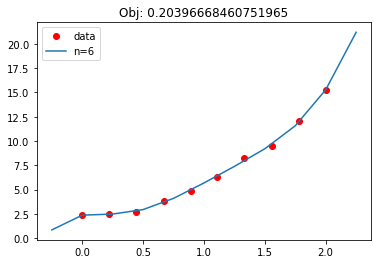

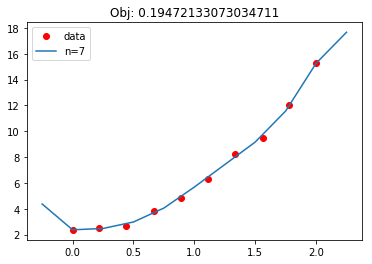

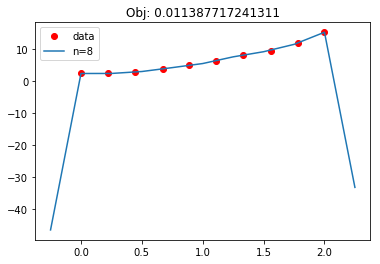

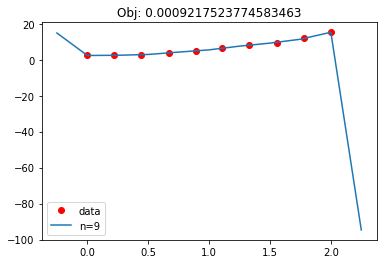

In [8]:
test_data = np.arange(-.25,2.5,.25)
for n in range(10):
    plt.plot(x,y,'ro',label='data')
    if n == 0: #having trouble using the code for n=0 as well
        plt.plot(test_data,coeffs_mat[n][0]*gen_mat(test_data,n),label='n={}'.format(n))
    else:
        plt.plot(test_data,np.matmul(gen_mat(test_data,n),coeffs_mat[n]),label='n={}'.format(n))
    plt.title("Obj: {}".format(obj[n]))
    plt.legend()
    plt.show()

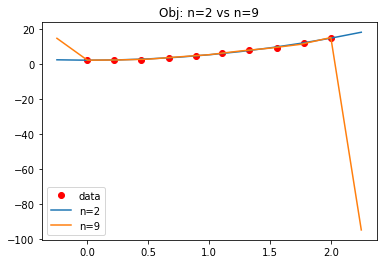

In [9]:
test_data = np.arange(-.25,2.5,.25)
plt.plot(x,y,'ro',label='data')
plt.plot(test_data,np.matmul(gen_mat(test_data,2),coeffs_mat[2]),label='n={}'.format(2))
plt.plot(test_data,np.matmul(gen_mat(test_data,9),coeffs_mat[9]),label='n={}'.format(9))
plt.title("Obj: n=2 vs n=9")
plt.legend()
plt.show()

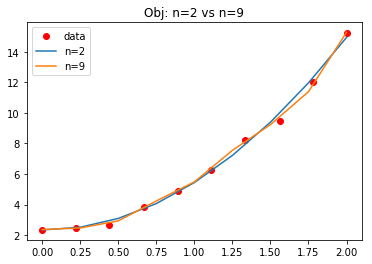

In [11]:
#zooming in

test_data = np.arange(0,2.25,.25)
plt.plot(x,y,'ro',label='data')
plt.plot(test_data,np.matmul(gen_mat(test_data,2),coeffs_mat[2]),label='n={}'.format(2))
plt.plot(test_data,np.matmul(gen_mat(test_data,9),coeffs_mat[9]),label='n={}'.format(9))
plt.title("Obj: n=2 vs n=9")
plt.legend()
plt.show()